In [1]:
%matplotlib inline
import sys
from os.path import exists

# this is the repository I pulled/downloaded from github: 
CONGA_PATH = '/rd2/user/xiacr/sle/source/conga/'
# confirm that it's the right level directory (since the repo and library have the same name)
assert exists(CONGA_PATH+'/README.md')
sys.path.append(CONGA_PATH)

import scanpy as sc
import conga
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
adata = sc.read_h5ad('../step2/all_tcell_merged_gex.h5ad')

In [4]:
adata.obs['old_index'] = adata.obs.index
adata.obs

,batch_gex_data,batch_clones_file,batch,old_index
AAACCTGAGAAGGTGA-1-0,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,0,AAACCTGAGAAGGTGA-1-0
AAACCTGAGCTAGTGG-1-0,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,0,AAACCTGAGCTAGTGG-1-0
AAACCTGAGCTCCTTC-1-0,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,0,AAACCTGAGCTCCTTC-1-0
AAACCTGAGCTGCGAA-1-0,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,0,AAACCTGAGCTGCGAA-1-0
AAACCTGAGCTTCGCG-1-0,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,0,AAACCTGAGCTTCGCG-1-0
...,...,...,...,...
TTTGTCATCGCGCCAA-1-21,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,21,TTTGTCATCGCGCCAA-1-21
TTTGTCATCGGCGCAT-1-21,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,21,TTTGTCATCGGCGCAT-1-21
TTTGTCATCTCTGCTG-1-21,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,21,TTTGTCATCTCTGCTG-1-21
TTTGTCATCTGACCTC-1-21,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,21,TTTGTCATCTGACCTC-1-21


In [5]:
# seu_meta.iloc[:,0]
tmp = adata.obs.batch_gex_data.str.split('/',expand=True).iloc[:,10].str.split('_',expand=True).iloc[:,0].reset_index(drop=True) # sample name
adata.obs['seu_barcode'] = 'unknown'
adata.obs['seu_barcode'] = ( tmp + '_' +adata.obs.index.str.split('1-',expand=True,n=1).to_frame().iloc[:,0].reset_index(drop=True)  + '1').to_list()
adata.obs['seu_barcode']

AAACCTGAGAAGGTGA-1-0     GW_AAACCTGAGAAGGTGA-1
AAACCTGAGCTAGTGG-1-0     GW_AAACCTGAGCTAGTGG-1
AAACCTGAGCTCCTTC-1-0     GW_AAACCTGAGCTCCTTC-1
AAACCTGAGCTGCGAA-1-0     GW_AAACCTGAGCTGCGAA-1
AAACCTGAGCTTCGCG-1-0     GW_AAACCTGAGCTTCGCG-1
                                 ...          
TTTGTCATCGCGCCAA-1-21    ZS_TTTGTCATCGCGCCAA-1
TTTGTCATCGGCGCAT-1-21    ZS_TTTGTCATCGGCGCAT-1
TTTGTCATCTCTGCTG-1-21    ZS_TTTGTCATCTCTGCTG-1
TTTGTCATCTGACCTC-1-21    ZS_TTTGTCATCTGACCTC-1
TTTGTCATCTGAGGGA-1-21    ZS_TTTGTCATCTGAGGGA-1
Name: seu_barcode, Length: 253966, dtype: object

In [6]:
cd8_seu_meta = pd.read_csv('./seurat_cd8_filter_meta.csv')
cd8_seu_meta.iloc[:,0] = cd8_seu_meta['orig.ident'] + '_' + cd8_seu_meta.iloc[:,0].str.split('_[0-9][0-9]|_[0-9]',expand=True,n=1).iloc[:,0]
seu_meta = cd8_seu_meta
seu_meta

,Unnamed: 0,orig.ident,nCount_RNA,nFeature_RNA,group,treatment,pair,percent_mito,percent_ribo,S.Score,...,Phase,old.ident,RNA_snn_res.0.8,RNA_snn_res.1,seurat_clusters,main_type,PIC,scrublet_doublet,subtype,RNA_snn_res.0.6
0,GW_AAACCTGAGCTGCGAA-1,GW,4432,1771,SLE,untreated,unpaired,1.015343,26.286101,0.039745,...,S,3,2,7,2,T.naive,no,False,T.CD8.mem,3
1,GW_AAACCTGCAAAGAATC-1,GW,4819,1938,SLE,untreated,unpaired,2.344885,23.843121,-0.033261,...,G1,0,3,1,3,T.cyto,no,False,T.CD8.Teff,2
2,GW_AAACCTGCAGAGTGTG-1,GW,3489,1427,SLE,untreated,unpaired,1.662367,30.868444,-0.023728,...,G1,3,2,2,2,T.cyto,no,False,T.CD8.mem,3
3,GW_AAACCTGCATCACAAC-1,GW,4005,1657,SLE,untreated,unpaired,1.722846,26.217228,0.038114,...,S,3,2,2,2,T.cyto,no,False,T.CD8.mem,3
4,GW_AAACCTGTCAGCTGGC-1,GW,3763,1564,SLE,untreated,unpaired,1.461600,30.002657,0.030827,...,S,3,2,2,2,T.cyto,no,False,T.CD8.mem,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62486,ZPP_AGGGAGTCAAGGACAC-1,ZPP,3540,1661,SLE,untreated,ZPP_pair,2.288136,18.163842,0.020393,...,S,5,0,4,0,T.cyto,no,False,T.CD8.Teff,0
62487,ZPP_CATCAAGGTAGAAAGG-1,ZPP,4158,1709,SLE,untreated,ZPP_pair,1.443001,21.067821,0.007197,...,S,5,1,0,1,T.cyto,no,False,T.CD8.Teff,0
62488,ZPP_GTATTCTGTACGCTGC-1,ZPP,3878,1704,SLE,untreated,ZPP_pair,1.160392,19.236720,-0.044914,...,G2M,5,10,12,10,T.cyto,no,False,T.CD8.IFN-response,8
62489,ZPP2_GCGAGAACATCTACGA-1,ZPP2,2996,1280,SLE,treated,ZPP_pair,1.802403,26.568758,-0.028668,...,G1,5,0,4,0,T.cyto,no,False,T.CD8.Teff,0


In [8]:
# seu_meta.iloc[:,0].isin(adata.obs['seu_barcode']).value_counts()
adata.obs['seu_barcode'].isin(seu_meta.iloc[:,0]).value_counts()

False    191475
True      62491
Name: seu_barcode, dtype: int64

In [9]:
tmp = adata.obs.merge(right= seu_meta, left_on='seu_barcode',right_on='Unnamed: 0',how  = 'left')
tmp.index = tmp['seu_barcode']
adata.obs = tmp

In [10]:
adata.obs.treatment.isna().value_counts()
adata = adata[~adata.obs.treatment.isna()]

In [11]:
adata.obs = adata.obs.drop(columns='scrublet_doublet')
adata.obs.index = adata.obs.old_index
adata.obs.index.name  = 'cell_barcode'
adata.write_h5ad('./all_cd8_merged_gex_subset.h5ad')

/home/xiacr/miniconda3/envs/conga/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'orig.ident' as categorical
/home/xiacr/miniconda3/envs/conga/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'group' as categorical
/home/xiacr/miniconda3/envs/conga/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a

In [ ]:
adata

# Do Conga analysis

In [14]:
gex_datafile = './all_cd8_merged_gex_subset.h5ad'
gex_datatype = 'h5ad' # other possibilities right now: ['10x_mtx', 'h5ad'] (h5ad from scanpy)
# tcr_datafile = './step2/' # not need
organism = 'human'

clones_file = '../step2/all_tcell_merged_clones.tsv'
kpca_file = '../step2/all_tcell_merged_clones_AB.dist_50_kpcs'
outfile_prefix = 'cd8_Tcell_filter' # this string will be prepended to results (figure and table) filenames

assert exists(gex_datafile)
assert exists(clones_file)
assert exists(kpca_file)

In [15]:
adata = conga.preprocess.read_dataset(gex_datafile, gex_datatype, clones_file ,kpca_file = kpca_file)

reading: ./all_cd8_merged_gex_subset.h5ad of type h5ad


/rd2/user/xiacr/sle/source/conga/conga/preprocess.py:226: DeprecationWarning: Use is_view instead of isview, isview will be removed in the future.
  if adata.isview: # ran into trouble with AnnData views vs copies


total barcodes: 62491 (62491, 36601)
reading: ../step2/all_tcell_merged_clones.tsv
reading: ../step2/all_tcell_merged_clones_AB.dist_50_kpcs
Reducing to the 50245 barcodes (out of 62491) with paired TCR sequence data


In [16]:
adata.uns['organism'] = organism

In [17]:
# IF use para hvg_batch_key =  batch ?
adata = conga.preprocess.filter_and_scale( 
    adata, 
    min_genes_per_cell=200,
    max_genes_per_cell=10000,
    max_percent_mito=0.2,
    hvg_batch_key='batch'
)

filtered out 0 cells with more than 10000 genes
filtered out 0 cells with more than 0.2 percent mito
get_feature_types_varname: feature_types feature_type_counts: [('Gene Expression', 20964)]
num antibody features: 0


/home/xiacr/miniconda3/envs/conga/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'va' as categorical
/home/xiacr/miniconda3/envs/conga/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'ja' as categorical
/home/xiacr/miniconda3/envs/conga/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future ver

excluding 160 TR genes (88 variable)
excluding 2 sexlinked genes
total of 622 variable genes (50245, 20964)
Normalize and logging matrix...
get_feature_types_varname: feature_types feature_type_counts: [('Gene Expression', 622)]
feature_types counter: [('Gene Expression', 20964)]
normalize_and_log_the_raw_matrix: adata.raw.X.max()=  2937.0


In [18]:
adata = conga.preprocess.reduce_to_single_cell_per_clone(adata)

compute pca to find rep cell for each clone (50245, 622)
num_clones: 20329
normalize_and_log_the_raw_matrix:: matrix is already logged
choose representative cell for clone: 0 20329 (50245, 622)
choose representative cell for clone: 1000 20329 (50245, 622)
choose representative cell for clone: 2000 20329 (50245, 622)
choose representative cell for clone: 3000 20329 (50245, 622)
choose representative cell for clone: 4000 20329 (50245, 622)
choose representative cell for clone: 5000 20329 (50245, 622)
choose representative cell for clone: 6000 20329 (50245, 622)
choose representative cell for clone: 7000 20329 (50245, 622)
choose representative cell for clone: 8000 20329 (50245, 622)
choose representative cell for clone: 9000 20329 (50245, 622)
choose representative cell for clone: 10000 20329 (50245, 622)
choose representative cell for clone: 11000 20329 (50245, 622)
choose representative cell for clone: 12000 20329 (50245, 622)
choose representative cell for clone: 13000 20329 (50245, 6

In [19]:
adata = conga.preprocess.cluster_and_tsne_and_umap( adata, clustering_resolution = 0.8,clustering_method = 'leiden',n_gex_pcs=50)

computing X_pca_gex using sc.tl.pca
running 1D UMAP gex
ran leiden clustering: leiden_gex
running 1D UMAP tcr
ran leiden clustering: leiden_tcr


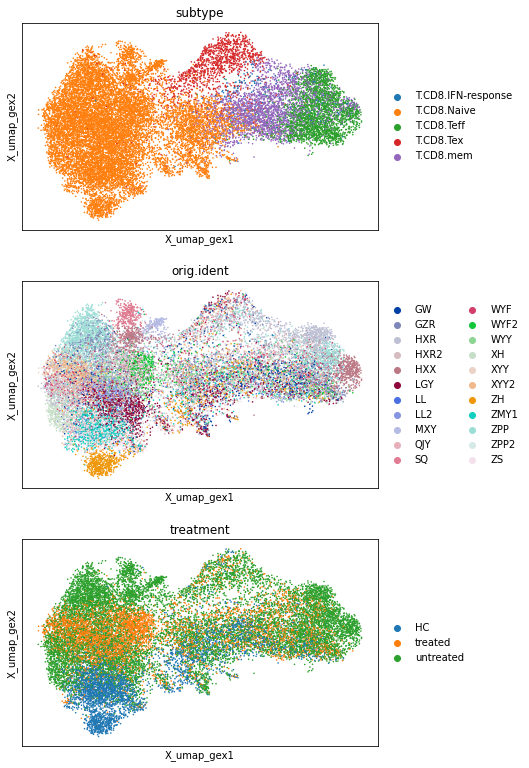

In [20]:
sc.pl.embedding(basis= 'X_umap_gex', adata = adata, color=[ 'subtype','orig.ident', 'treatment'],ncols=1,size=10 )

In [21]:
nbr_fracs = [0.01, 0.1]

# we use this nbrhood size for computing the nndists
nbr_frac_for_nndists = 0.01

all_nbrs, nndists_gex, nndists_tcr = conga.preprocess.calc_nbrs(
    adata, nbr_fracs, also_calc_nndists=True, nbr_frac_for_nndists=nbr_frac_for_nndists)

# stash these in obs array, they are used in a few places...
adata.obs['nndists_gex'] = nndists_gex
adata.obs['nndists_tcr'] = nndists_tcr

conga.preprocess.setup_tcr_cluster_names(adata) #stores in adata.uns

allocating memory for 4126787 gex nbrs
allocated 16507148 bytes memory id= 140235057607184
allocating memory for 4126787 tcr nbrs
allocated 16507148 bytes memory id= 140233012572048
allocating memory for 41308528 gex nbrs
allocated 165234112 bytes memory id= 140233012568496
allocating memory for 41308528 tcr nbrs
allocated 165234112 bytes memory id= 140233012575472
compute D gex batch= 0 num_batches= 7 N= 20329 batch_size= 3301
argpartitions: gex batch= 0 nbr_frac= 0.01
argpartitions: gex batch= 0 nbr_frac= 0.1
compute D tcr batch= 0 num_batches= 7 N= 20329 batch_size= 3301
argpartitions: tcr batch= 0 nbr_frac= 0.01
argpartitions: tcr batch= 0 nbr_frac= 0.1
compute D gex batch= 1 num_batches= 7 N= 20329 batch_size= 3301
argpartitions: gex batch= 1 nbr_frac= 0.01
argpartitions: gex batch= 1 nbr_frac= 0.1
compute D tcr batch= 1 num_batches= 7 N= 20329 batch_size= 3301
argpartitions: tcr batch= 1 nbr_frac= 0.01
argpartitions: tcr batch= 1 nbr_frac= 0.1
compute D gex batch= 2 num_batches= 

In [22]:
results = conga.correlations.run_graph_vs_graph(
    adata, all_nbrs, outfile_prefix=outfile_prefix)


find_neighbor_neighbor_interactions:
find_neighbor_cluster_interactions:
find_neighbor_cluster_interactions:
find_neighbor_neighbor_interactions:
find_neighbor_cluster_interactions:
find_neighbor_cluster_interactions:
saved graph_vs_graph results to tsvfile: cd8_Tcell_filter_graph_vs_graph.tsv


In [23]:
results = adata.uns['conga_results'][conga.tags.GRAPH_VS_GRAPH]
results.head() 

,conga_score,num_neighbors_gex,num_neighbors_tcr,overlap,overlap_corrected,mait_fraction,clone_index,nbr_frac,graph_overlap_type,cluster_size,gex_cluster,tcr_cluster,va,ja,cdr3a,vb,jb,cdr3b
32,0.001162,NaN,2032.0,446,445,0.013453,1096,0.10,gex_cluster_vs_tcr_nbr,3565.0,0,5,TRAV1-2*01,TRAJ31*01,CAVRNNNARLMF,TRBV27*01,TRBJ2-1*01,CASTTSGGGNEQFF
29,0.004084,NaN,2032.0,442,441,0.013575,1047,0.10,gex_cluster_vs_tcr_nbr,3565.0,0,5,TRAV1-2*01,TRAJ30*01,CAVRLRDDKIIF,TRBV28*01,TRBJ2-7*01,CASSPTGAAYEQYF
44,0.013636,NaN,2032.0,438,437,0.002283,10325,0.10,gex_cluster_vs_tcr_nbr,3565.0,0,3,TRAV22*01,TRAJ18*01,CAVDDRGSTLGRLYF,TRBV27*01,TRBJ2-7*01,CASSLAGLLSYEQYF
22,0.018728,2032.0,2032.0,267,267,0.000000,19140,0.10,gex_nbr_vs_tcr_nbr,NaN,4,13,TRAV8-3*01,TRAJ49*01,CAVGATGNQFYF,TRBV30*01,TRBJ2-1*01,CGAAGYNEQFF
4,0.020036,203.0,203.0,12,12,0.000000,18301,0.01,gex_nbr_vs_tcr_nbr,NaN,1,1,TRAV8-1*01,TRAJ7*01,CAVNAHDRLAF,TRBV27*01,TRBJ2-5*01,CASRTLQGGAETQYF


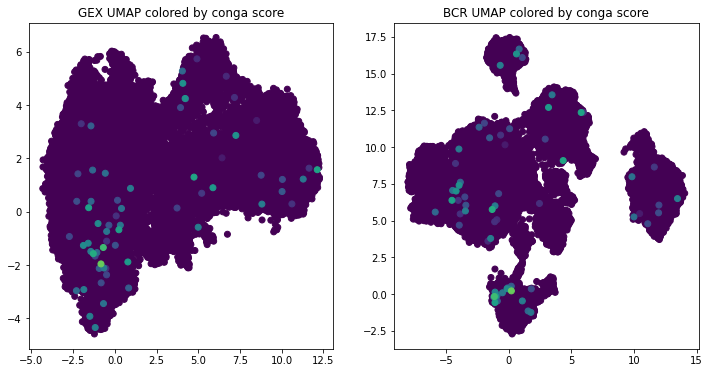

In [24]:
conga_scores = adata.obs['conga_scores']
colors = np.sqrt(np.maximum(-1*np.log10(conga_scores),0.0))
reorder = np.argsort(colors)

plt.figure(figsize=(12,6))
plt.subplot(121)
xy = adata.obsm['X_gex_2d']
plt.scatter( xy[reorder,0], xy[reorder,1], c=colors[reorder], vmin=0, vmax=np.sqrt(5))
plt.title('GEX UMAP colored by conga score')

plt.subplot(122)
xy = adata.obsm['X_tcr_2d']
plt.scatter( xy[reorder,0], xy[reorder,1], c=colors[reorder], vmin=0, vmax=np.sqrt(5))
plt.title('BCR UMAP colored by conga score');

making tcr score table, #features= 35
run rank_genes_groups [('none', 20297), ('clp_0_5', 15), ('clp_0_3', 11), ('clp_6_3', 6)]


/home/xiacr/miniconda3/envs/conga/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'test' as categorical


making cluster logos: 0 3 cd8_Tcell_filter_graph_vs_graph_logos.png
None
/home/xiacr/miniconda3/envs/conga/bin/cairosvg
/home/xiacr/miniconda3/envs/conga/bin/cairosvg -f png -o cd8_Tcell_filter_graph_vs_graph_logos.png.tmp_0_3_0.png cd8_Tcell_filter_graph_vs_graph_logos.png.tmp_0_3_0.svg
None
/home/xiacr/miniconda3/envs/conga/bin/cairosvg
/home/xiacr/miniconda3/envs/conga/bin/cairosvg -f png -o cd8_Tcell_filter_graph_vs_graph_logos.png.tmp_0_3_1.png cd8_Tcell_filter_graph_vs_graph_logos.png.tmp_0_3_1.svg
None
/home/xiacr/miniconda3/envs/conga/bin/cairosvg
/home/xiacr/miniconda3/envs/conga/bin/cairosvg -f png -o cd8_Tcell_filter_graph_vs_graph_logos.png_tmp_0_3_A.png cd8_Tcell_filter_graph_vs_graph_logos.png_tmp_0_3_A.svg
None
/home/xiacr/miniconda3/envs/conga/bin/cairosvg
/home/xiacr/miniconda3/envs/conga/bin/cairosvg -f png -o cd8_Tcell_filter_graph_vs_graph_logos.png_tmp_0_3_B.png cd8_Tcell_filter_graph_vs_graph_logos.png_tmp_0_3_B.svg
None
/home/xiacr/miniconda3/envs/conga/bin/cairo

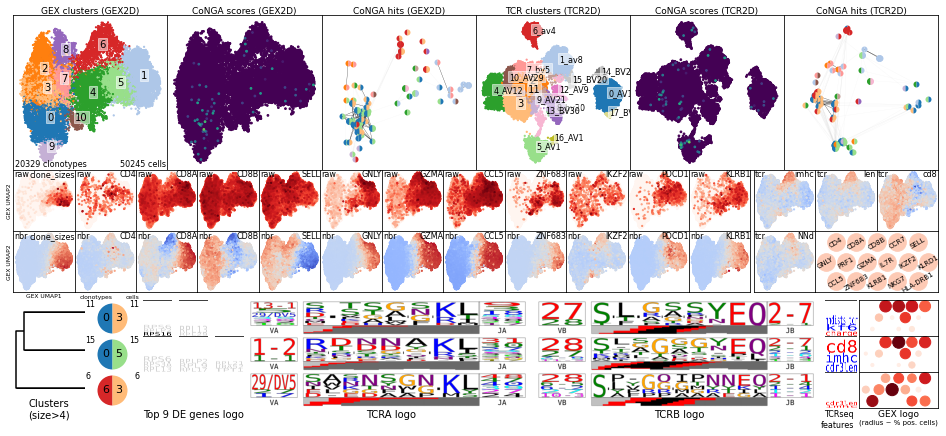

In [25]:
nbrs_gex, nbrs_tcr = all_nbrs[0.1]

min_cluster_size = 5

conga.plotting.make_graph_vs_graph_logos(
    adata,
    outfile_prefix,
    min_cluster_size,
    nbrs_gex,
    nbrs_tcr,
)